In [0]:
#Simple ANN - Perceptron Learning Algorithms

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

[[ 0.66661758  0.74220799]
 [ 0.06656204  0.62018719]
 [ 0.82892527  0.04877117]
 [-0.01351045  0.43277921]
 [-0.01223884  0.83733239]
 [ 0.14018143 -0.08189212]
 [ 0.69264984  0.65848255]
 [ 0.24957045  0.19528719]
 [-0.07510437  0.79604537]
 [ 0.52829337  0.61152382]
 [ 0.09010967  0.41710712]
 [ 0.22938069  0.1960036 ]
 [ 0.04249122  0.71285739]
 [ 0.73742374  0.70575638]
 [ 0.38599342  0.14401087]
 [ 0.87185251  0.75974507]
 [ 0.76412767  0.68478593]
 [ 0.72003325  0.2407578 ]
 [ 0.0700368   0.49854365]
 [ 0.03984206 -0.09005865]
 [ 0.10617922  0.01034874]
 [ 0.55085539  0.43014587]
 [ 0.40830797  0.34268662]
 [ 0.44770313  0.76137752]
 [ 0.49278458  0.54257843]]
[0.41066048, 0.63786503, 1]
[ 0.10325222  0.03873319  0.07733031  0.07464389  0.13642337 -0.01152266
  0.07084295  0.05705027  0.00033133  0.05992057  0.07983151  0.02313764
  0.13622658  0.02764644  0.09331393 -0.00187766  0.00714821  0.00955635
  0.03520162  0.09680541  0.01311699  0.13269397  0.0926269   0.10028436
  0.

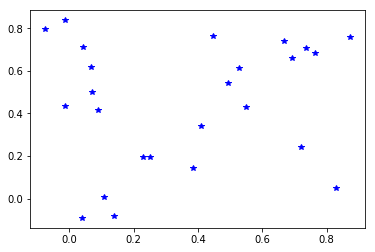

In [69]:
#create a random number for some positive & negative number(Randomly generated)
#This would be my point for not linearly separable
data_x1 = (np.random.rand(25) -0.1)
data_x2 = (np.random.rand(25) -0.1)

x1_df = pd.DataFrame(data=data_x1, columns = ['X1 Data'])
x2_df = pd.DataFrame(data=data_x2, columns = ['X2 Data'])


#Concatenate the x1 & x2.
my_data = np.concatenate([x1_df, x2_df], axis=1)

print(my_data)
#w_1 & w_2 are generated randomly, but w_0 as 0
##weights = np.random.rand(1)
##weights = np.random.rand(2)

weights = [0.41066048, 0.63786503, 1]
print(weights)
print(test)
#Training Data
label = weights[0]*data_x1 + weights[1]*data_x2 + weights[2]

#Run through activation to get the true result, what we really expect
for i in range(25):
  if label[i] >= 0:
    label[i] = 1
  else:
    label[i] = -1

#Just used pandas to use the visualization.
y_df=pd.DataFrame(data=label, columns= ['Y'])
print(y_df)
#Concatenate all the data into one, then this is going to be the training data for my model
#I used the pandas library for just visualization.
my_final_data = list(np.concatenate([my_data, y_df], axis=1))

#To show the our x1 & x2 data in Graphical way.
plt.plot(data_x1, data_x2, 'b*')

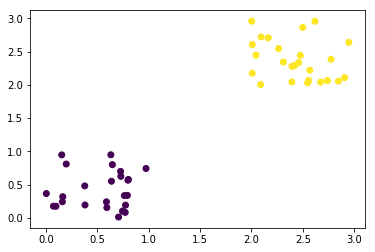

In [70]:
pos = np.random.sample((25,2)) + 2
neg = np.random.sample((25,2))

pos_target = np.ones(25)
neg_target = np.zeros(25) - 1

x = np.concatenate([pos, neg], axis = 0)
y = np.concatenate([pos_target, neg_target], axis = 0)
plt.scatter(x = x[:, 0], y = x[:,1], c = y)

x_one = x[:,0]
x_two = x[:,1] - 1

x_one_df =pd.DataFrame(data=x_one, columns=['x_one'])
x_two_df = pd.DataFrame(data=x_two, columns= ['x_two'])

weights_2 = [1, -1, 0]
my_xdata_df = pd.concat([x_one_df, x_two_df], axis=1)
label1 = 1*x[:,0] + -1*x[:,1]
for i in range(50):
  if label1[i] >= 0:
    label1[i] =1
  else:
    label1[i] =-1
y_df_1=pd.DataFrame(data=label1, columns= ['Y'])
my_final_data_l = list(np.concatenate([my_xdata_df, label1[:,None]], axis=1))

In [0]:
#Prediction function
def predict(inputs,weights):
	activation=0.0
	for i,w in zip(inputs,weights):
		activation += i*w 
	return 1.0 if activation>=0.0 else -1.0


#Accuracy function 
def accuracy(mat,weights):
	num_correct = 0.0
	preds       = []
	for i in range(len(mat)):
    #Define the predicted classification 
		pred   = predict(mat[i][:-1], weights) 
		preds.append(pred)
    
		if pred==mat[i][-1]: num_correct+=1.0 
      
	print("Predictions:",preds)
	return num_correct/(float(len(mat)))


#Train the model
def test_weights(mat, weights, nb_epoch=10, l_rate=0.1):
	for epoch in range(nb_epoch):
		cur_acc = accuracy(mat,weights)
		print("\nEpoch %d \nWeights: "%epoch, weights)
		print("Accuracy: ",cur_acc)
		
		for i in range(len(mat)):
			prediction = predict(mat[i][:-1],weights) # get predicted classificaion
			error      = mat[i][-1]-prediction		     #  get error from real classification
			for j in range(len(weights)): 				      # calculate new weight for each node
				weights[j] = weights[j]+(l_rate*error*mat[i][j]) 
				
	return weights 


In [73]:
#train the model
test_weights(my_final_data, weights=weights, nb_epoch=20, l_rate=0.1)

Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 0 
Weights:  [0.4903445990216302, 0.4577477236101891, 3.0000000000000004]
Accuracy:  0.96
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 1 
Weights:  [0.4983130109237932, 0.439735992971208, 3.2000000000000006]
Accuracy:  0.96
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 2 
Weights:  [0.5062814228259562, 0.42172426233222693, 3.400000000000001]
Accuracy:  0.96
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 3 
Weights:  [0.5142498347281192, 0.40371253169324584, 3.600000000000001]
Accuracy:  0.96
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

[0.5859655418475864, 0.24160695594241602, 5.400000000000002]

Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 0 
Weights:  [0.4903445990216302, 0.4577477236101891, 3.0000000000000004]
Accuracy:  0.96
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 1 
Weights:  [0.4983130109237932, 0.439735992971208, 3.2000000000000006]
Accuracy:  0.96
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 2 
Weights:  [0.5062814228259562, 0.42172426233222693, 3.400000000000001]
Accuracy:  0.96
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 3 
Weights:  [0.5142498347281192, 0.40371253169324584, 3.600000000000001]
Accuracy:  0.96
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 4 
Weights:  [0.5222182466302823, 0.38570080105426474, 3.800000000000001]
Accuracy:  0.96
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 5 
Weights:  [0.5301866585324453, 0.36768907041528365, 4.000000000000001]
Accuracy:  0.96
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 6 
Weights:  [0.5381550704346083, 0.34967733977630255, 4.200000000000001]
Accuracy:  0.96
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 7 
Weights:  [0.5461234823367713, 0.33166560913732146, 4.400000000000001]
Accuracy:  0.96
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 8 
Weights:  [0.5540918942389343, 0.31365387849834037, 4.600000000000001]
Accuracy:  0.96
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 9 
Weights:  [0.5620603061410974, 0.29564214785935927, 4.800000000000002]
Accuracy:  0.96
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 10 
Weights:  [0.5700287180432604, 0.2776304172203782, 5.000000000000002]
Accuracy:  0.96
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 11 
Weights:  [0.5779971299454234, 0.2596186865813971, 5.200000000000002]
Accuracy:  0.96
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 12 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 13 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 14 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 15 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 16 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 17 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 18 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 19 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 20 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 21 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 22 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 23 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 24 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 25 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 26 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 27 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 28 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 29 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 30 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 31 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 32 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 33 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 34 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 35 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 36 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 37 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 38 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 39 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 40 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 41 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 42 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 43 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 44 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 45 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 46 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 47 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 48 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 49 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 50 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 51 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 52 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 53 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 54 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 55 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 56 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 57 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 58 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 59 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 60 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 61 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 62 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 63 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 64 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 65 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 66 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 67 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 68 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 69 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 70 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 71 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 72 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 73 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 74 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 75 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 76 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 77 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 78 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 79 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 80 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 81 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 82 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 83 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 84 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 85 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 86 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 87 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 88 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 89 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 90 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 91 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 92 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 93 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 94 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 95 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 96 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 97 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 98 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 99 
Weights:  [0.5859655418475864, 0.24160695594241602, 5.400000000000002]
Accuracy:  1.0
[0.5859655418475864, 0.24160695594241602, 5.400000000000002]

In [80]:
#test it with different weights & constant
wtest = np.random.rand(3)

#test it with shuffle datat sets
wtest

array([0.709964  , 0.46692334, 0.17473287])

In [83]:
train_weights(my_final_data, weights=wtest, nb_epoch=100, l_rate=0.1) ##Test the data with linearly separable

Predictions: [1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 0 
Weights:  [ 2.44551769e-01 -4.35749031e-02  4.35574733e+02]
Accuracy:  0.76
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 1 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 2 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 3 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

array([2.57864177e-01, 8.04625347e-02, 4.35774733e+02])

Predictions: [1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 0 
Weights:  [ 2.44551769e-01 -4.35749031e-02  4.35574733e+02]
Accuracy:  0.76
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 1 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 2 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 3 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 4 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 5 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 6 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 7 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 8 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 9 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 10 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 11 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 12 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 13 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 14 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 15 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 16 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 17 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 18 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 19 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 20 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 21 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 22 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 23 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 24 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 25 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 26 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 27 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 28 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 29 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 30 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 31 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 32 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 33 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 34 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 35 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 36 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 37 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 38 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 39 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 40 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 41 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 42 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 43 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 44 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 45 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 46 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 47 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 48 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 49 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 50 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 51 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 52 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 53 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 54 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 55 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 56 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 57 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 58 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 59 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 60 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 61 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 62 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 63 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 64 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 65 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 66 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 67 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 68 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 69 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 70 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 71 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 72 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 73 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 74 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 75 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 76 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 77 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 78 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 79 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 80 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 81 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 82 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 83 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 84 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 85 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 86 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 87 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 88 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 89 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 90 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 91 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 92 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 93 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 94 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 95 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 96 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 97 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 98 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 99 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
array([2.57864177e-01, 8.04625347e-02, 4.35774733e+02])

In [85]:
 #test the model with different test data & non linearly separable
train_weights(my_final_data_l, weights=weights, nb_epoch=1000, l_rate=0.1)

Predictions: [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 0 
Weights:  [0.0025814435540299635, -0.027369737537061983, 925.0000000000733]
Accuracy:  0.5
Predictions: [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 1 
Weights:  [0.04842867026827276, -0.2236643603002921, 929.4000000000743]
Accuracy:  0.5
Predictions: [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

[0.04972727734131806, -0.22103238376192166, 5312.399999997359]

Predictions: [1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 0 
Weights:  [ 2.44551769e-01 -4.35749031e-02  4.35574733e+02]
Accuracy:  0.76
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 1 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 2 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 3 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 4 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 5 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 6 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 7 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 8 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 9 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 10 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 11 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 12 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 13 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 14 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 15 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 16 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 17 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 18 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 19 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 20 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 21 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 22 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 23 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 24 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 25 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 26 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 27 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 28 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 29 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 30 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 31 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 32 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 33 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 34 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 35 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 36 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 37 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 38 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 39 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 40 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 41 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 42 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 43 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 44 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 45 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 46 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 47 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 48 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 49 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 50 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 51 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 52 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 53 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 54 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 55 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 56 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 57 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 58 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 59 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 60 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 61 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 62 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 63 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 64 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 65 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 66 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 67 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 68 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 69 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 70 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 71 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 72 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 73 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 74 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 75 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 76 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 77 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 78 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 79 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 80 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 81 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 82 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 83 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 84 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 85 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 86 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 87 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 88 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 89 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 90 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 91 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 92 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 93 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 94 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 95 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 96 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 97 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 98 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
Predictions: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 99 
Weights:  [2.57864177e-01 8.04625347e-02 4.35774733e+02]
Accuracy:  1.0
array([2.57864177e-01, 8.04625347e-02, 4.35774733e+02])